# **CGA and Interpolations**

This section is based on the article "Direct Linear Interpolation of Geometric Objects in Conformal Geometric Algebra" by Hadfield and Lasenby.

In [1]:
using Pkg
Pkg.activate(".")
using CliffordAlgebras
import CliffordAlgebras: basegrade
using LinearAlgebra: norm, normalize, dot
using LaTeXStrings

using Plots
include("./auxiliary.jl")
plotly();

  Activating project at `~/MEGA/EMAP/Julia_Tutorials/GeometricAlgebra`


## 1. Interpolating Points

From a vector $\mathbf v$, recall that we can contruct a point in the CGA model as

$$
F(\mathbf v) = n_o + \mathbf v  + \frac{1}{2}(\mathbf v \cdot \mathbf v) n_\infty.
$$

Given two point $a$ and $b$, we might wish to interpolate them. This could be done using
$$
F(\lambda \mathbf a + (1-\lambda) \mathbf b),
$$
where $\mathbf a$ and $\mathbf b$ are the Euclidean coordinates of the points.

As pointed out by Hadfield and Lasenby

$$
F(\lambda \mathbf a + (1-\lambda) \mathbf b) = \lambda a + (1-\lambda) b + \lambda(1-\lambda) (a \cdot b) n_\infty.
$$

This formula shows us that if we have two points in CGA and want to interpolate them we can just
interpolate them and add the extra $\lambda(1-\lambda) (a \cdot b) n_\infty$. This would give
us the interpolated point in CGA.

The "inverse" problem also has a solution, i.e. given the interpolation $c' = \lambda a + (1- \lambda)b)$, we want to 
obtain $c = F(\lambda \mathbf a + (1-\lambda) \mathbf b)$. Note that $c'$ is not a point in CGA, but $c$ is. Hence, we were
given only the interpolation $c'$ and want to figure out $c$ without knowing who $a$ and $b$ are. We can solve this using:

$$
c = \frac{- c' n_\infty  c'}{2(c' \cdot n_\infty)^2}
$$

In [2]:
cl = CliffordAlgebra(:CGA3D)

no  = (cl.e₊ + cl.e₋)/2
n∞  = cl.e₋ - cl.e₊

F(x) = no + x + (x ⋅ x) * n∞ /2
point(x=0,y=0,z=0)  = no + x*cl.e1 + y*cl.e2 + z*cl.e3 + (x^2 + y^2 + z^2) * n∞/2

point (generic function with 4 methods)

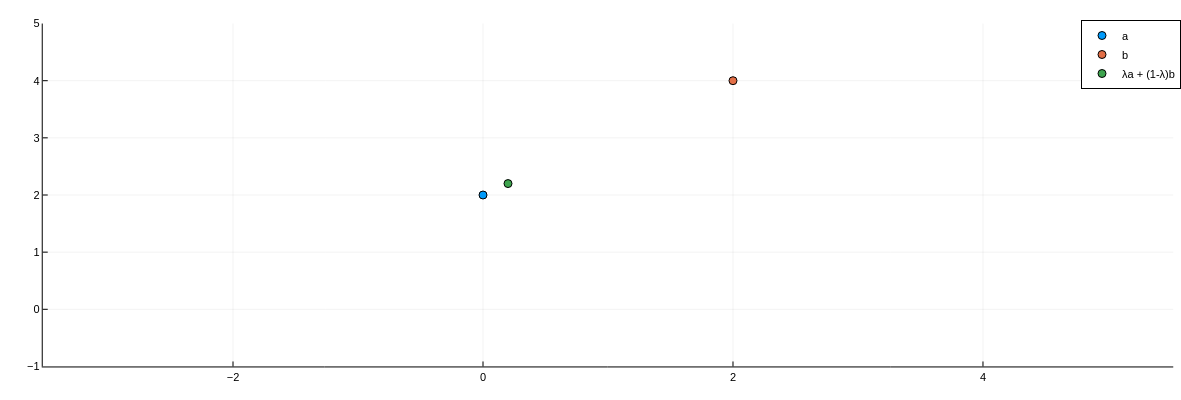

In [3]:
a = point(0,2,0)
b = point(2,4,0)
λ = 0.9
c = λ*a + (1-λ)*b + λ*(1-λ)*(a ⋅ b)* n∞

p1 = scatter([a.e1],[a.e2],label="a")
p1 = scatter!([b.e1],[b.e2],label="b", aspect_ratio=1,ylims=(-1,5))
p1 = scatter!([c.e1],[c.e2],legend=true,label="λa + (1-λ)b")

In [4]:
c_ = λ*a + (1-λ)*b

@show (-c_*n∞ *c_)/(2*((c_ ⋅ n∞)^2)) ≈ c;

(-c_ * n∞ * c_) / (2 * (c_ ⋅ n∞) ^ 2) ≈ c = true


## 2. Interpolating Blades with Grade ≥ 2

We've shown how to interpolate points. The formula to interpolate other blades is different.

Let $X_1$ and $X_2$ be two blades with the same grade 2 or above. We want to interpolate them, e.g.
given two circles, we want to interpolate it to get a circle "in the middle".

Let $X'_\alpha =  \alpha X_1 + (1- \alpha)X_2$. This operation does not guarantee that we obtain
another blade with grade equal to $X_1$ and $X_2$. Similar to how happends to points, we need a slightly
different formulation.

$$
X_\alpha = S X'_\alpha = \frac{kS}{(kS)(kS^-)},
$$
where
$$
k S^- = \sqrt{-X'_\alpha \tilde{X'_\alpha}},
$$
and
$$
kS = \langle k S^- \rangle_0 - \langle k S^- \rangle_4
$$

Note that $k = \frac{1}{S^- S}$ is a scalar and both $S$ and $S^-$ only contains 0 and 4
grade coefficients.

To compute the square root of an element of the Conformal Algebra that only contains
0 and 4 grade coeffients, we can use the following formula:

$$
\sqrt{\Sigma} = \frac{\langle \Sigma \rangle_0 \pm
[[\Sigma]]}{\sqrt 2 \sqrt{\langle \Sigma \rangle_0} \pm [[\Sigma]]} +
\frac{\langle \Sigma \rangle_4}{\sqrt 2 \sqrt{\langle \Sigma \rangle_0 \pm [[\Sigma]]}},
$$
where $[[\Sigma]] = \sqrt{\langle \Sigma \rangle_0^2 + \langle \Sigma \rangle_4^2}$.

In [5]:
function Base.:√(Σ::MultiVector)
    Σbracket = √(scalar(grade(Σ,0)^2 + grade(Σ,4)^2))
    D = (√(2)*√scalar(grade(Σ,0)+Σbracket))
    if D == 0
        return 0
    end
    L = (grade(Σ,0) + Σbracket)/D
    R = grade(Σ,4)/D
    
    return L + R
end

In [6]:
p = point(0,1,0)
q = point(1,0,0)
l1 = p ∧ q ∧ n∞

p = point(0,3,0)
q = point(3,0,0)
l2 = p ∧ q ∧ n∞

α = 0.5

Xꜝα = α*l1 + (1-α) *l2
kS⁻ = √(-Xꜝα * reverse(Xꜝα))
kS  = grade(kS⁻,0) - grade(kS⁻,4)
Xα  = kS / ((kS)*(kS⁻)) * Xꜝα

-1.7677669529663689×e1e₊e2-1.7677669529663689×e1e2e₋-0.7071067811865476×e1e₊e₋-0.7071067811865476×e2e₋e₊ ∈ Cl(4, 1, 0)

In [7]:
weight = norm(n∞ ⨼ (no ⨼ l1))
v = n∞ ⨼ (no ⨼ l1)/weight

+0.7071067811865475×e1-0.7071067811865475×e2 ∈ Cl(4, 1, 0)

In [8]:
weight = norm(n∞ ⨼ (no ⨼ l2))
v = n∞ ⨼ (no ⨼ l2)/weight

+0.7071067811865476×e1-0.7071067811865476×e2 ∈ Cl(4, 1, 0)

In [9]:
weight = norm(n∞ ⨼ (no ⨼ Xα))
v = n∞ ⨼ (no ⨼ Xα)/weight

+0.7071067811865476×e1-0.7071067811865476×e2 ∈ Cl(4, 1, 0)

In [10]:
d = round(getblades((no ⨼ l1) / l1); digits=2)

+0.5×e1+0.5×e2 ∈ Cl(4, 1, 0)

In [11]:
d = round(getblades((no ⨼ l2) / l2); digits=2)

+1.5×e1+1.5×e2 ∈ Cl(4, 1, 0)

In [12]:
d = round(getblades((no ⨼ Xα) / Xα); digits=2)

+1.25×e1+1.25×e2 ∈ Cl(4, 1, 0)